<a href="https://colab.research.google.com/github/Rahman17309/ASSIGNMENT1/blob/main/Clustering_Airlines_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preprocessing:

* Load the dataset

* Check for missing values and handle them if any.

* Scale the numerical features if necessary (since clustering algorithms are sensitive to feature scales).








In [1]:
!pip install openpyxl
import pandas as pd
df = pd.read_excel("/content/EastWestAirlines.xlsx", sheet_name=1)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [3]:
# Column rename
df.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)

In [4]:
#Set ID as Index Column
df.set_index('ID',inplace=True)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


# Data Exploration

Descriptive Statistics

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0
Days_since_enroll,3999.0,4118.559390,2065.134540,2.0,2330.0,4096.0,5790.5,8296.0


In [7]:
# different cc_miles have different max values.
# so, we want to check what values these columns can take

print('unique_cc1',df.cc1_miles.unique())
print('unique_cc2',df.cc2_miles.unique())
print('unique_cc3',df.cc3_miles.unique())

unique_cc1 [1 4 3 2 5]
unique_cc2 [1 2 3]
unique_cc3 [1 3 2 4 5]


Duplicate Value check

In [8]:
df.duplicated().sum()

1

In [9]:
df[df.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

Missing values check

In [12]:
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

There are no missing / Null and Duplicated values either in columns or rows, so we can move on to the next step, which is Exploratory Data Analysis.

# Exploratory Data Analysis.

Lets analyze the features by creating histograms to understand the distribution

Distribution plots

In [15]:
import plotly.express as px

for column in df.columns:
    fig = px.histogram(df, x=column, title=f'{column} Distribution')
    fig.show()

Kernel Density Estimation

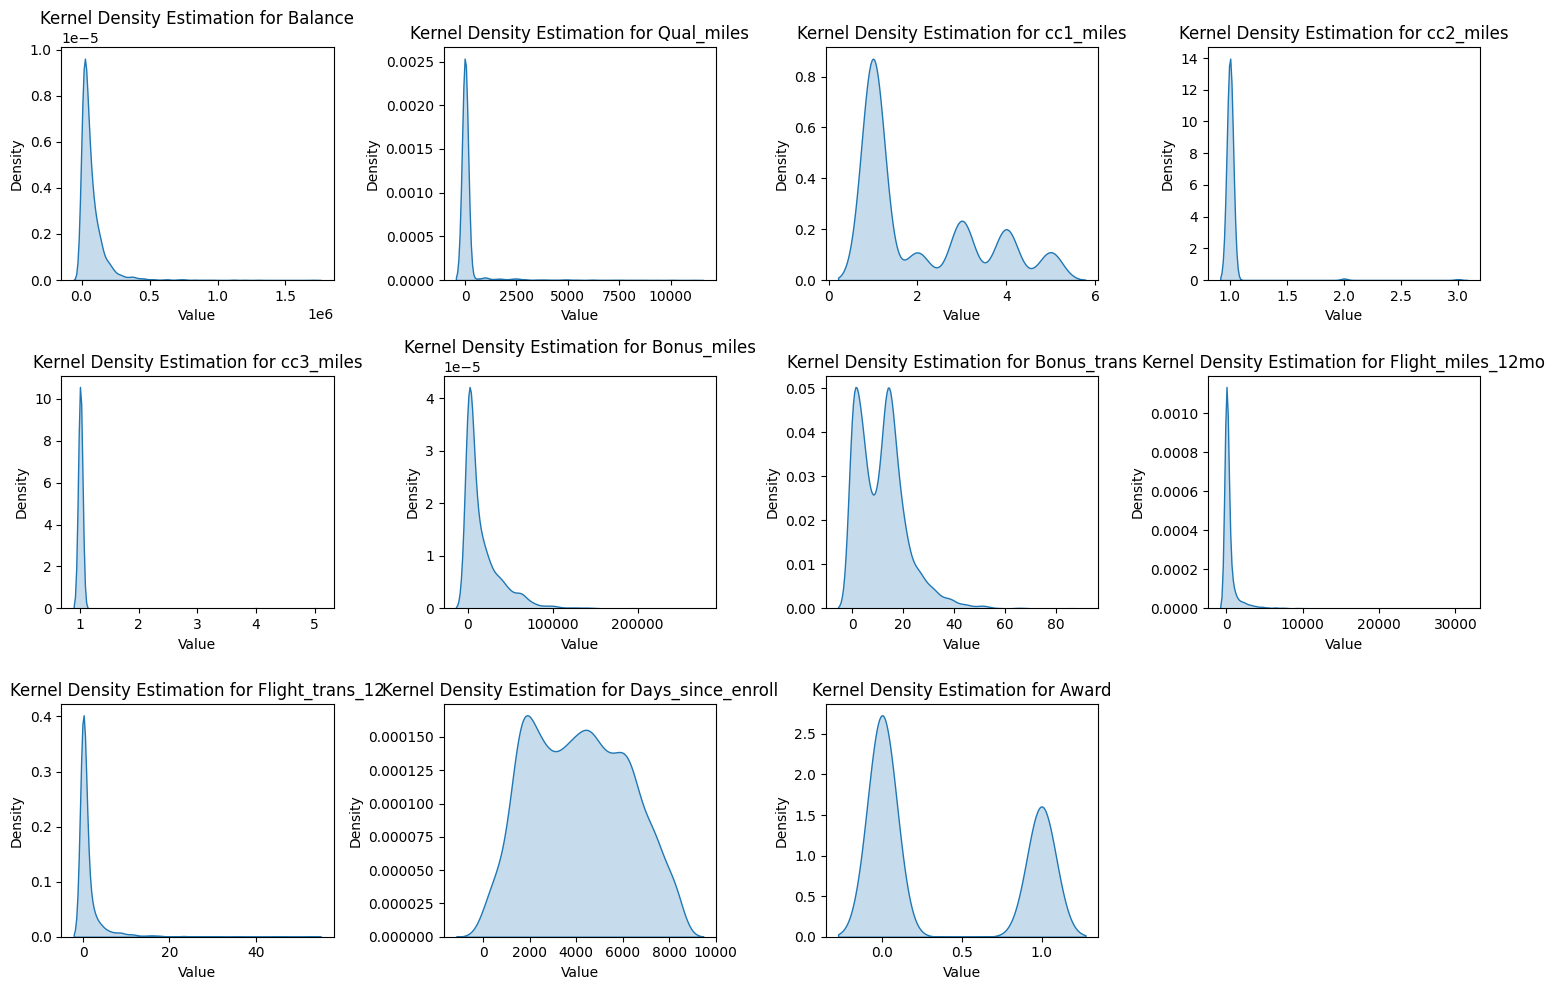

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure containing subplots
fig = plt.figure(figsize=(15, 10))

# Plot KDE for each feature
for i, column in enumerate(df.columns):
    ax = fig.add_subplot(3, 4, i + 1)
    sns.kdeplot(df[column], fill=True, ax=ax)
    ax.set_title(f'Kernel Density Estimation for {column}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
plt.tight_layout()
plt.show()

Outliers Detection

<ipython-input-25-da2cb9c75995>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-25-da2cb9c75995>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-25-da2cb9c75995>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-25-da2cb9c75995>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-25-da2cb9c75995>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be

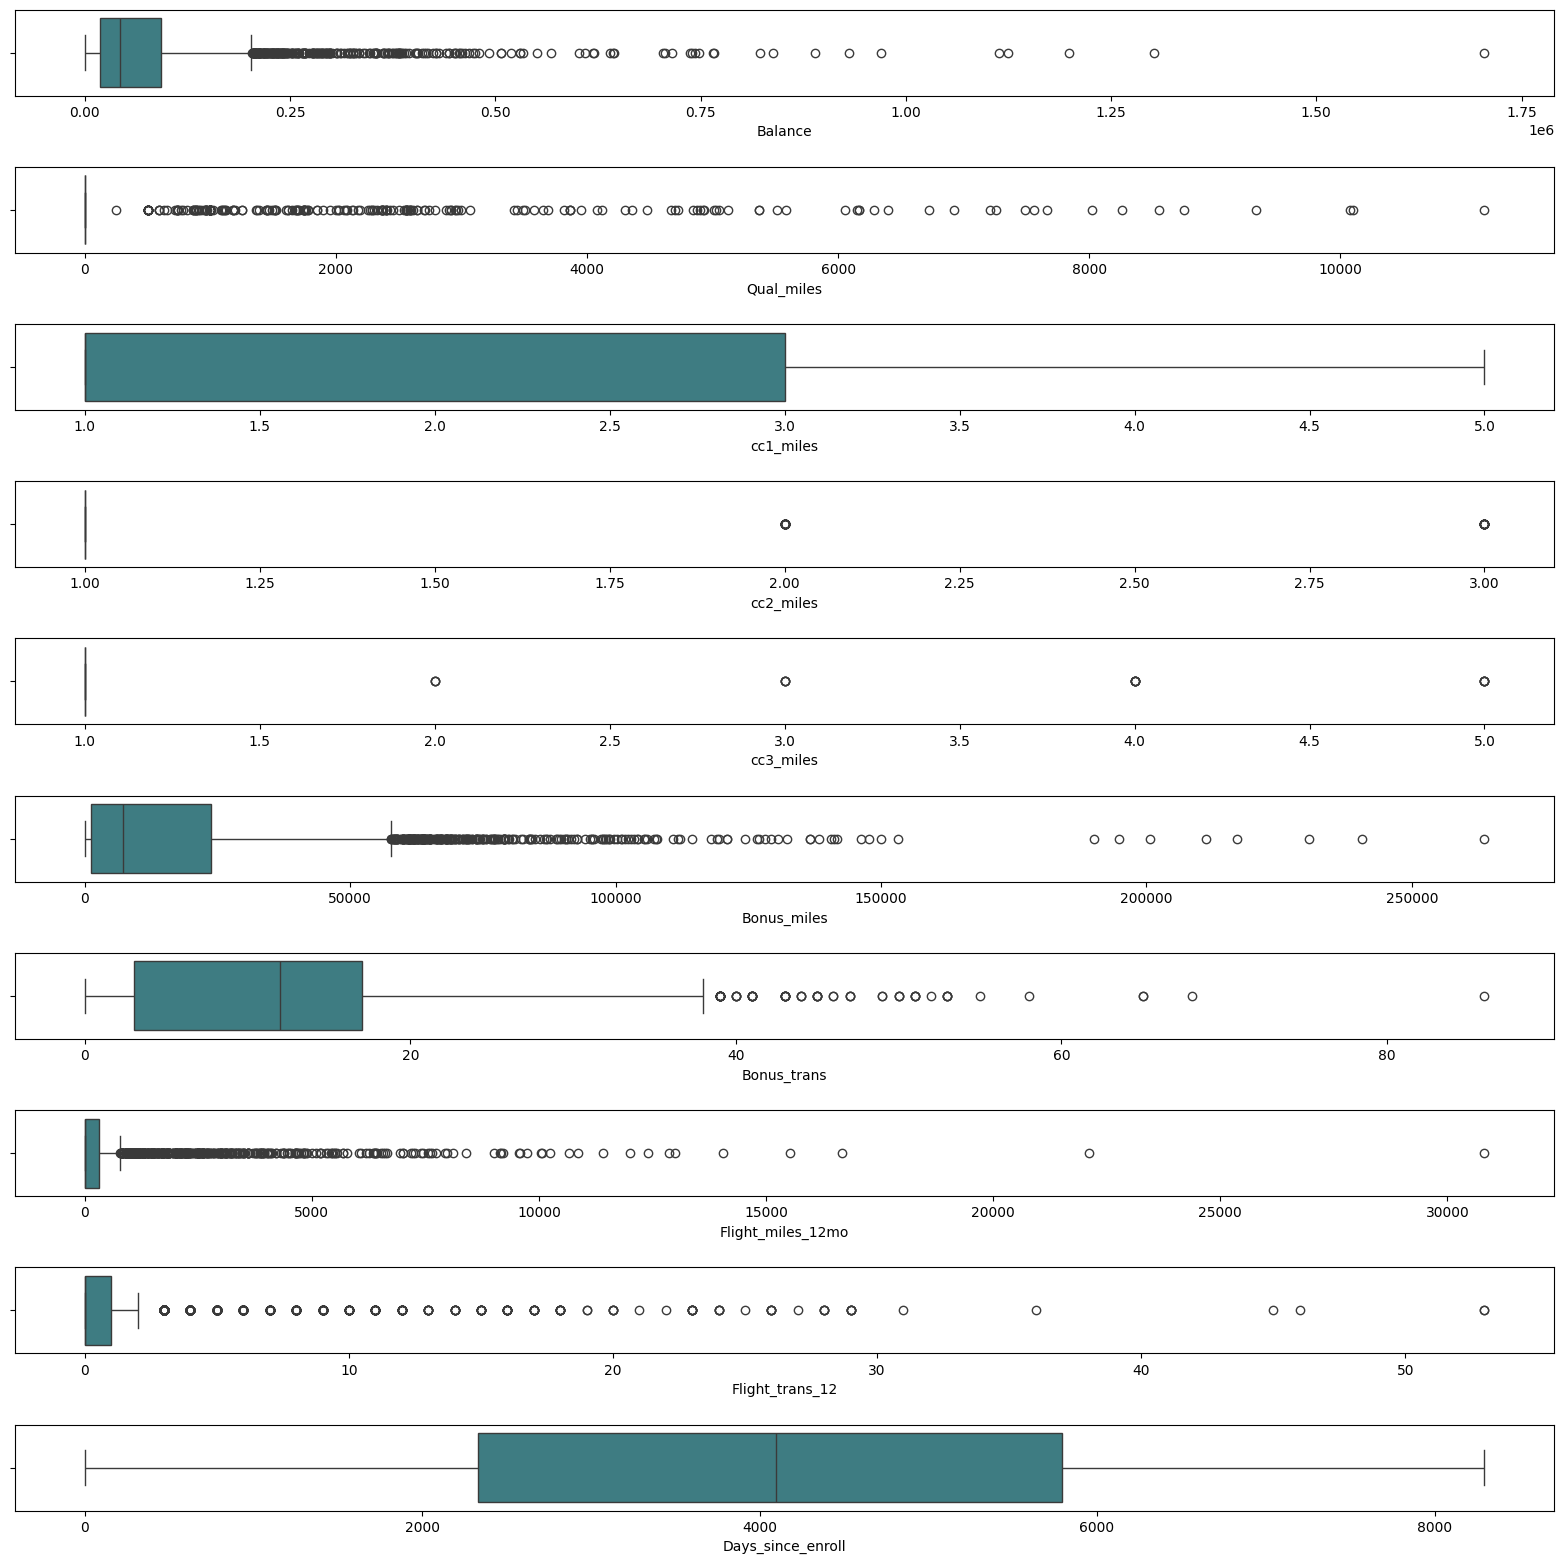

In [25]:
ot=df.copy()
fig, axes=plt.subplots(10,1,figsize=(16,16),sharex=False,sharey=False)
sns.boxplot(x='Balance',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Qual_miles',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='cc1_miles',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='cc2_miles',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='cc3_miles',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Bonus_miles',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Bonus_trans',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Flight_miles_12mo',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='Flight_trans_12',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='Days_since_enroll',data=ot,palette='crest',ax=axes[9])
plt.tight_layout(pad=2.0)

Box plot for every feature in the same graph

<Axes: >

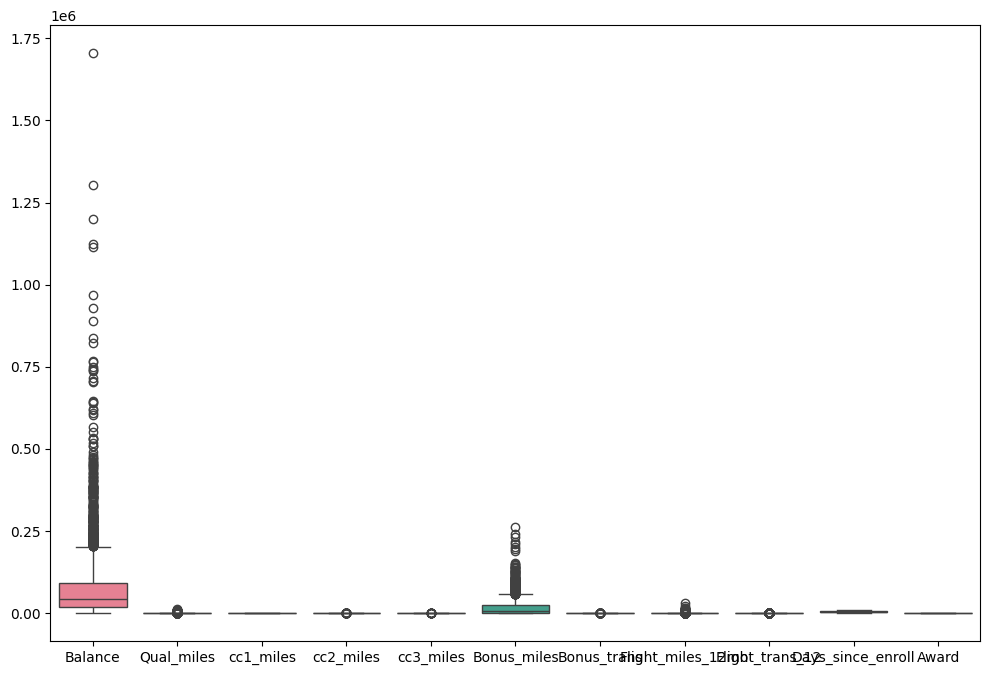

In [30]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df)

we use sqrt() to see more clearly despite the outliers


<Axes: >

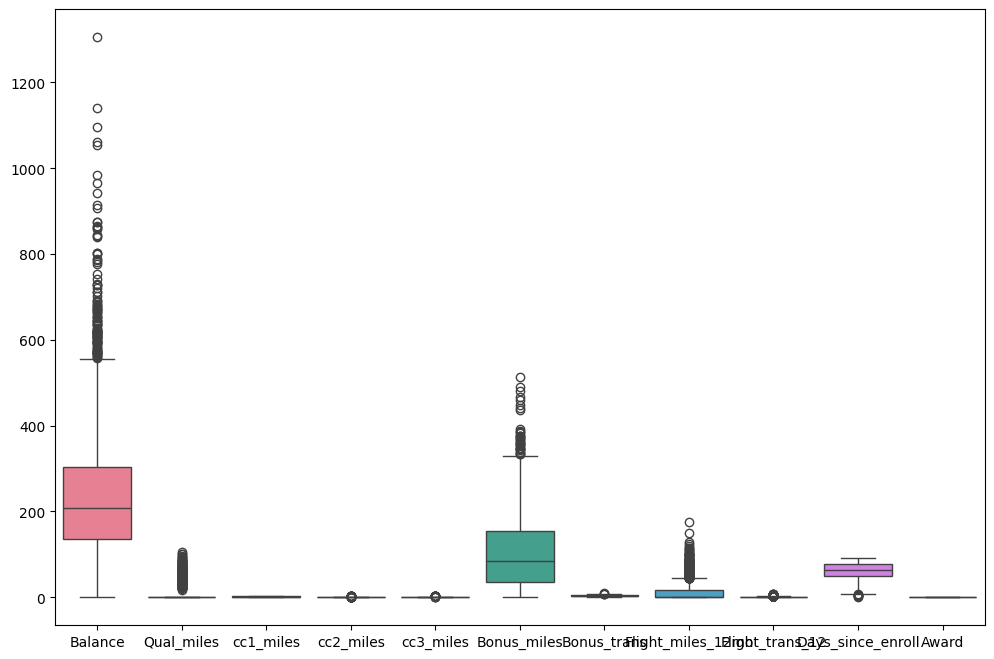

In [31]:
import numpy as np
plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(df))

# Data Visualization

Analysis of Award Status in Customer Data

Counting Customers with and without Award:

In [32]:
countNotermdeposit = len(df[df.Award == 0])
counthavetermdeposit = len(df[df.Award == 1])
print("Percentage of Customers without an Award: {:.2f}%".format((countNotermdeposit / len(df.Award))*100))
print("Percentage of Customers with an Award: {:.2f}%".format((counthavetermdeposit / len(df.Award))*100))

Percentage of Customers without an Award: 62.96%
Percentage of Customers with an Award: 37.04%


Text(0.5, 1.0, 'Whether the client has a Award or not ')

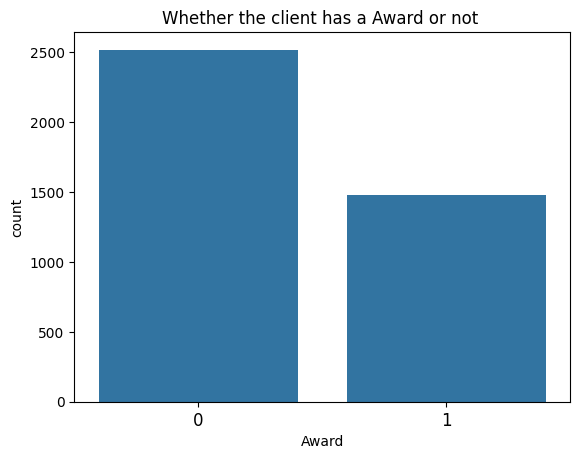

In [38]:
sns.countplot(x='Award', data=df,
              order=df['Award'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Whether the client has a Award or not ')

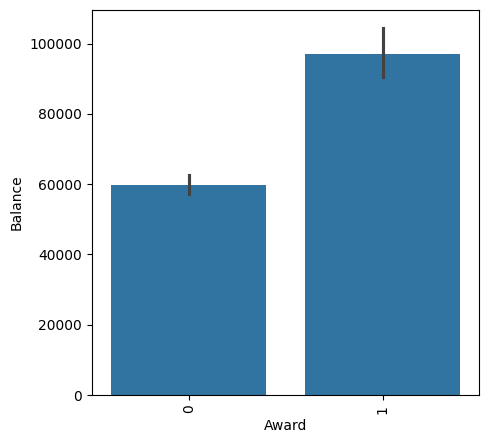

In [40]:
# Balance : Number of miles eligible for award travel

plt.figure(figsize = (5,5))
Balance = df[['Award','Balance']].sort_values('Balance', ascending = False)
ax = sns.barplot(x='Award', y='Balance', data= Balance)
ax.set(xlabel = 'Award', ylabel= 'Balance')
plt.xticks(rotation=90)
plt.show()

what is correlated with Balance?

In [41]:
corr_matrix = df.corr()
corr_matrix["Balance"].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403410
cc1_miles            0.338252
Bonus_trans          0.324797
Days_since_enroll    0.262975
Flight_trans_12      0.255656
Flight_miles_12mo    0.217509
Award                0.178380
Qual_miles           0.108696
cc3_miles            0.035234
cc2_miles           -0.008822
Name: Balance, dtype: float64

correlation heatmap

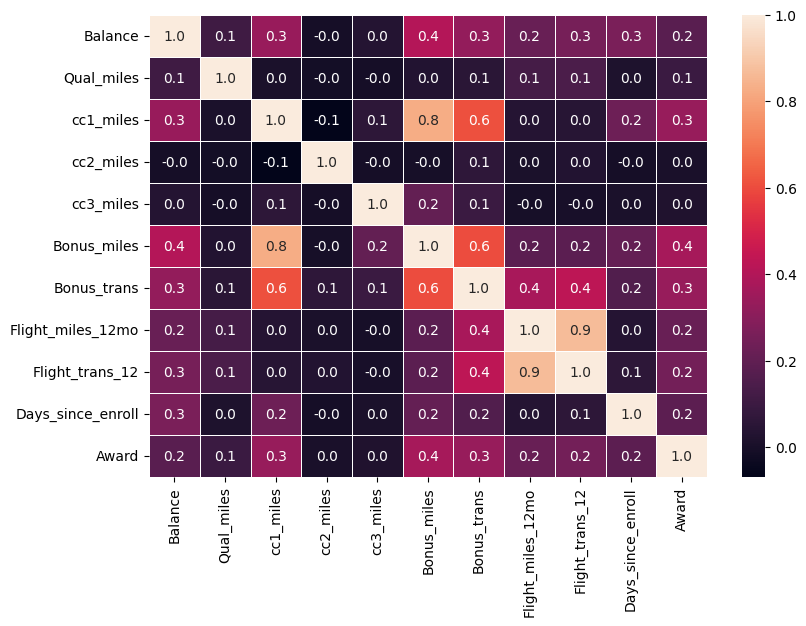

In [44]:
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

Unique points in this correlation matrix:

flight_trans_12 is positively correlated with flight_miles_12mo

bonus_trans is positively correlated with cc1_miles

bonus_trans is positively correlated with bonus_miles

bonus_miles is positively correlated with cc1_miles



In other words, the following are positively correlated

Number of flight transactions in the past 12 months <-> Number of flight miles in the past 12 months

Miles passengers earn with the freq. flyer credit card <-> Amount of non-flight transactions

Number of non-flight bonus transactions <-> Miles passengers earn from non-flight bonus transactions

Miles passengers earn from non-flight bonus transactions <-> Miles passengers earn with the freq. flyer credit card

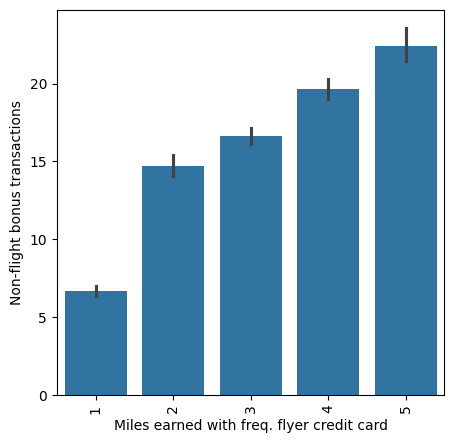

In [46]:
# Plotting frequent flying bonuses vs. non-flight bonus transactions
plt.figure(figsize = (5,5))
sorted_data = df[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

People who fly more frequently use bonus transactions more

# Data Preprocessing

Standardizing the Data

In [48]:
!pip install scikit-learn
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df)
std_df.shape

(3998, 11)

Normalizing the data Using Minmaxscaler for accuracy result comparison

In [49]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(df)
minmax_df.shape

(3998, 11)

# KMeans Clustering

In [50]:
from sklearn.cluster import KMeans

For K-means, it's often a good idea to scale the data as we done above

Choosing the number of clusters (K)

Example: Using the elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

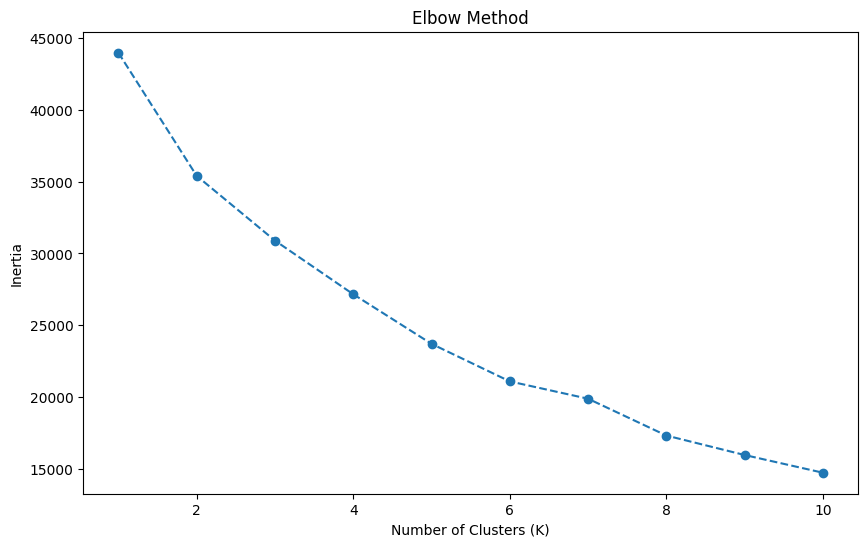

In [52]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(std_df)
    inertia.append(kmeans.inertia_)

# Plotting the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


From the elbow method, selecting the optimal number of clusters K=6

In [53]:
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(std_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=6, random_state=42)

In [58]:
df['Kmeans_Cluster'] = kmeans.labels_

<ipython-input-58-68dc8a87c5d3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
df.drop('Cluster', axis=1, inplace=True)

<ipython-input-61-6546257ef5ed>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
df.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award', 'Kmeans_Cluster'],
      dtype='object')

In [56]:
fig = px.scatter(df, x=df.columns[0], y=df.columns[1], color='Cluster',
                 title='K-means Clustering',
                 labels={df.columns[0]: 'Feature 1', df.columns[1]: 'Feature 2', 'Cluster': 'Cluster'},
                 color_continuous_scale='viridis')

# Show the plot
fig.show()

# Hierarchical Clustering Algorithm

In order to create a dendogram we need to define the linkage and create a linkage matrix

we would need the appropriate library for the same

In [63]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

Finding the Distance using Euclidean Distance with Complete (maximum) linkage: Maximum distance among all data points in two clusters

In [65]:
z = linkage(minmax_df, method = "complete", metric = "euclidean")

Now we plot the dendogram

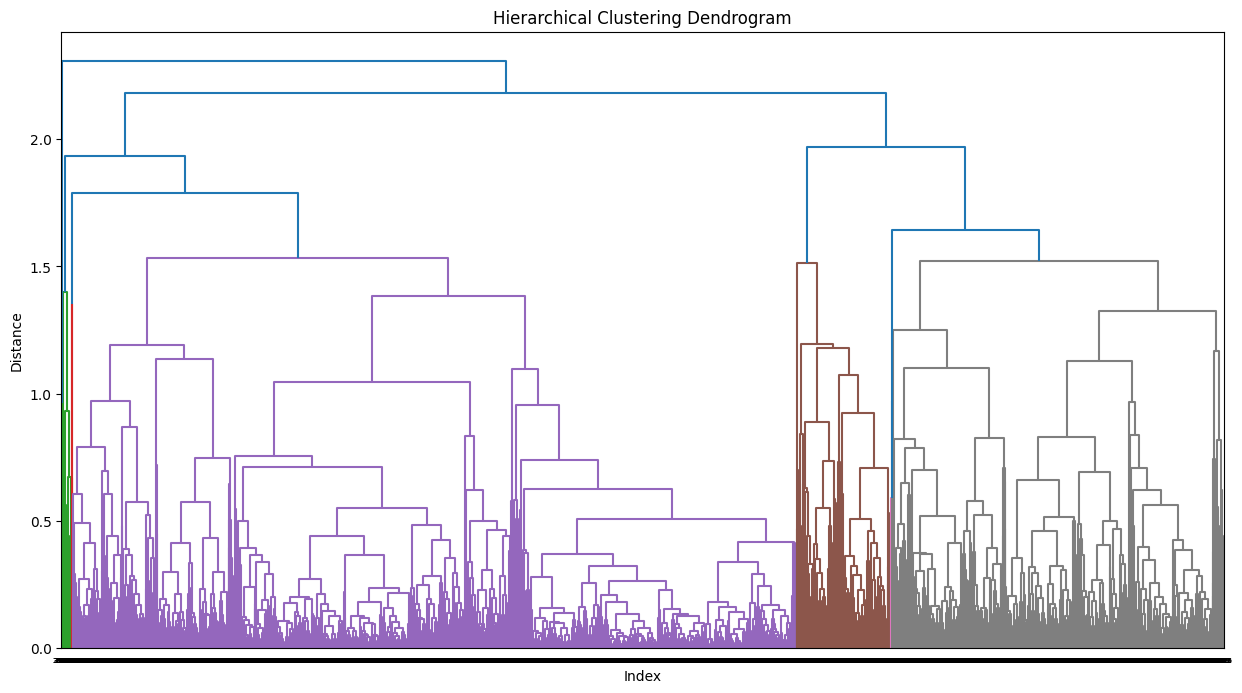

In [66]:
plt.figure(figsize=(15, 8));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, leaf_rotation = 0,  leaf_font_size = 5 )
plt.show()

We select the number of clusters from the dendogram as "4"

Heirarchical clustering means creating a tree of clusters by iteratively grouping or separating data points. There are two types of hierarchical clustering: Agglomerative clustering Divisive clustering We now apply the Agglomerative clustering technique:Agglomerative clustering is kind of a bottom-up approach. Each data point is assumed to be a separate cluster at first. Then the similar clusters are iteratively combined

In [68]:
from sklearn.cluster import AgglomerativeClustering
h_complete = AgglomerativeClustering(n_clusters = 4, linkage = 'complete', affinity = "euclidean").fit(minmax_df)
h_complete.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



array([0, 0, 0, ..., 2, 0, 0])

These labels for the clusters so formed are in the array form, which needs to be changed to incorporate into the dataset

In order to do so, we use the type casting and change the array to a series which will be easier to incorporate

In [69]:
cluster_labels = pd.Series(h_complete.labels_)

In [70]:
df['Hierar_Cluster'] = cluster_labels

<ipython-input-70-a6242c021722>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Cluster,Hierar_Cluster
ID,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0,0.0
2,19244,0,1,1,1,215,2,0,0,6968,0,0,0.0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0.0
4,14776,0,1,1,1,500,1,0,0,6952,0,0,1.0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,3,0.0


In [74]:
df.iloc[:, 0:].groupby(df.Hierar_Cluster).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Cluster,Hierar_Cluster
Hierar_Cluster,,,,,,,,,,,,,
0.0,68840.538217,156.410430,1.984475,1.016322,1.012739,16239.376592,11.381768,473.052548,1.385350,3849.515525,0.353503,1.039411,0.0
1.0,105014.425466,137.503106,2.450311,1.003106,1.006211,24267.229814,13.127329,462.881988,1.512422,5768.198758,0.431677,1.406832,1.0
2.0,76462.136444,122.477993,2.129401,1.014085,1.013204,17364.584507,11.749120,440.167254,1.336268,4312.307218,0.392606,1.157570,2.0
3.0,35757.500000,0.000000,1.500000,1.000000,1.000000,5808.500000,10.250000,37.500000,0.250000,2119.250000,0.250000,0.000000,3.0


We can now clearly see the 4 number of clusters formed, which can be described as under

    1. Cluster1 = "0" = Defines the group of fliers that earn the most out of the card and are frequent fliers
    2. Cluster2 = "1" = Defines the group of fliers that earn but are the third most frequent fliers
    3. Cluster3 = "2" = Defines the group of fliers that earn the least and are the least frequent fliers
    4. Cluster4 = "3" = Defines the group of fliers that earn but and are the second most frequent fliers

# DBSCAN - (Density Based Spatial Clustering of Applications with Noise)

To choose the best combination of the algorithm parameters I will first create a matrix of investigated combinations.

In [80]:
from itertools import product

eps_values = np.arange(0.25,3,0.25) # eps values to be investigated
min_samples = np.arange(3,23) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [82]:
!pip install scikit-learn
from sklearn.metrics import silhouette_score

eps_values = np.arange(0.25,3,0.25) # eps values to be investigated
min_samples = np.arange(3,23) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(std_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(std_df, DBS_clustering.labels_))

Collecting number of generated clusters.

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


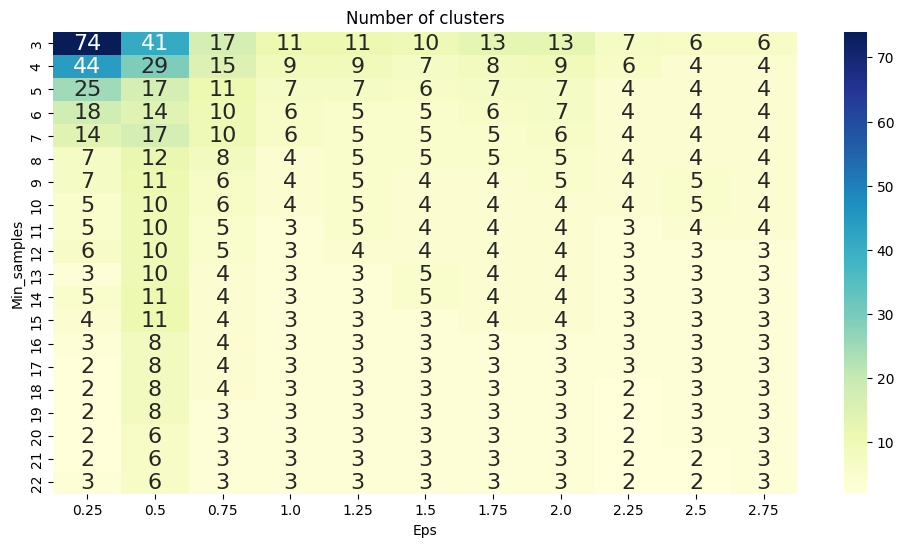

In [83]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

As the heatplot above shows, the number of clusters vary from 74 to 2.

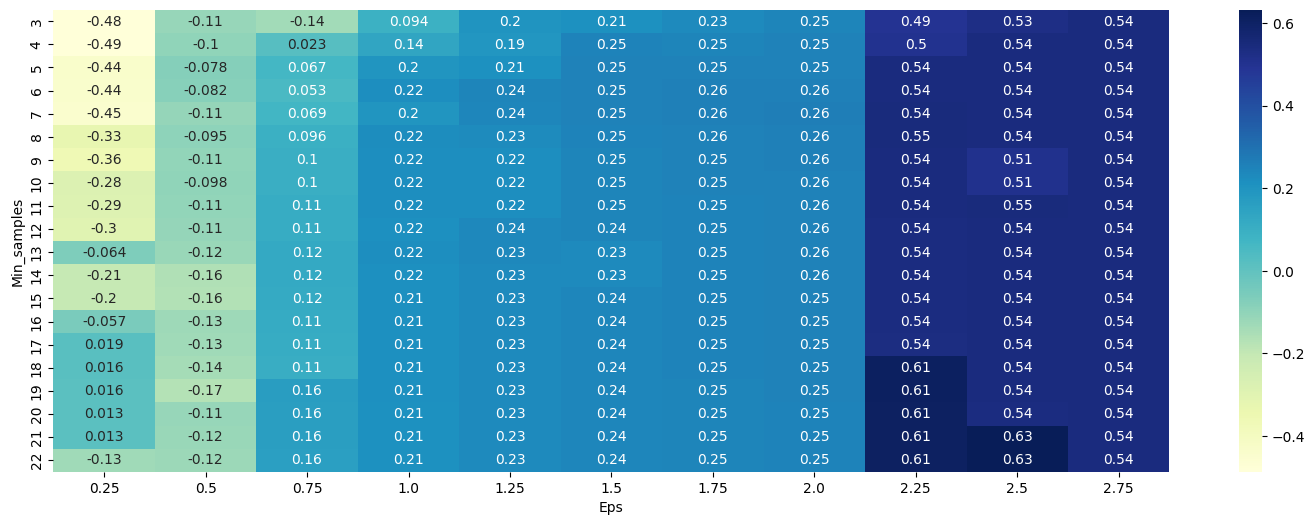

In [84]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

Global maximum is 0.63 for eps=2.5 and min_samples=21 and 22

In [87]:
!pip install scikit-learn
from sklearn.metrics import silhouette_score as sil
import seaborn as sns

epsilon = [0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75]
min_samples = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_df)
        #cluster_labels=dbscan.fit_predict(data)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(std_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0],
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 2.5 
min_sample= 21 
number of clusters= 1 
average silhouette score= 0.6319


Run DBSCAN on Standard Scaled data with optimal min_sample and epsilon values

In [88]:
dbscan = DBSCAN(eps=2.5, min_samples=21)
dbscan.fit(std_df)

DBSCAN(eps=2.5, min_samples=21)

In [89]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

-1 are the noise points in our dataset and the rest are the clusters

In [90]:
df['DBSCAN_labels'] = dbscan.labels_
df.head()

<ipython-input-90-59fd2eac982c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Cluster,Hierar_Cluster,DBSCAN_labels
ID,,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0,0.0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0,0.0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0.0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0,1.0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,3,0.0,0


In [91]:
df.groupby('DBSCAN_labels').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Cluster,Hierar_Cluster
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
DBSCAN_labels,,,,,,,,,,,,,
-1,211990.889423,1522.576923,2.509615,1.278846,1.235577,45335.081731,24.754808,3276.389423,9.548077,4768.596154,0.687500,2.754808,0.639423
0,66025.489182,68.500792,2.035092,1.000000,1.000000,15602.254090,10.883113,305.613193,0.925330,4083.549868,0.353034,1.008179,0.656665


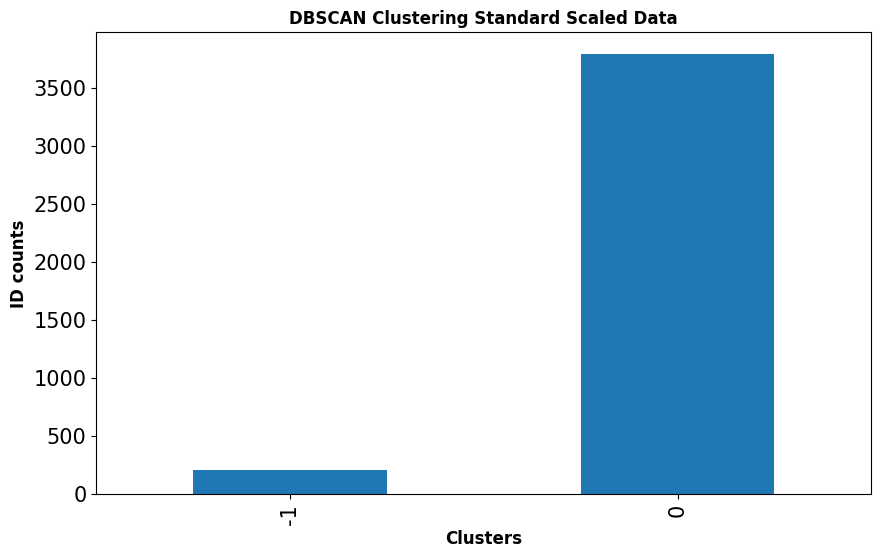

In [93]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
df.groupby('DBSCAN_labels').count()['Balance'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering Standard Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

# conculsion

I have applied EDA to analyze dataset.Discovered correlation between different variables and found colinearity.

Applied Standardazation & MinMaxScalar transformation on the data to use Principle componets analysis effectively.

I have used & analyzed 3 clustering techniques here..
i) KMeans,
ii) Hierarchical Clusterig &
iii) DBSCAN.

By applying clustering on different transformation data shows fluctuation in model score.

So finally the Standard Scaler found less score so not used for further model building.
KMeans clustering is sensitive to outliers